# Get $\gamma$ and $A_+ = A_-$

In [1]:
# variables
psi = var('psi')
tau = var('tau'); assume(tau > 0)
k = var('k')
L = var('L'); assume(L > 0)
l = var('l'); assume(l > 0)
v0 = var('v0'); assume(l > 0)
s = var('s')

# system [gamma, A]
system = Matrix([
    
    [(tau*psi + 2)*(tau*psi + 2 - 2 *s*l*v0) - 2,
    -l*((1 - k*l/(1 + (tau*psi)/2)) + (1 + k*l/(1 + (tau*psi)/2))*exp(-k*L))],
    
    [2*((tau*psi + 2) + 1),
    (2/k)*(1 - exp(-k*L))*(1 + 1/(tau*psi + 2))]
    
])

# solution
[[gamma], [A]] = system \ Matrix([[0], [1]])

In [2]:
latex(A)

-\frac{1}{2 \, {\left(\frac{{\left(\psi \tau + 3\right)} {\left({\left(\frac{2 \, k l}{\psi \tau + 2} + 1\right)} e^{\left(-L k\right)} - \frac{2 \, k l}{\psi \tau + 2} + 1\right)} l}{{\left(2 \, l s v_{0} - \psi \tau - 2\right)} {\left(\psi \tau + 2\right)} + 2} + \frac{{\left(\frac{1}{\psi \tau + 2} + 1\right)} {\left(e^{\left(-L k\right)} - 1\right)}}{k}\right)}}

In [3]:
latex(gamma)

\frac{{\left({\left(\frac{2 \, k l}{\psi \tau + 2} + 1\right)} e^{\left(-L k\right)} - \frac{2 \, k l}{\psi \tau + 2} + 1\right)} l}{2 \, {\left({\left(2 \, l s v_{0} - \psi \tau - 2\right)} {\left(\psi \tau + 2\right)} + 2\right)} {\left(\frac{{\left(\psi \tau + 3\right)} {\left({\left(\frac{2 \, k l}{\psi \tau + 2} + 1\right)} e^{\left(-L k\right)} - \frac{2 \, k l}{\psi \tau + 2} + 1\right)} l}{{\left(2 \, l s v_{0} - \psi \tau - 2\right)} {\left(\psi \tau + 2\right)} + 2} + \frac{{\left(\frac{1}{\psi \tau + 2} + 1\right)} {\left(e^{\left(-L k\right)} - 1\right)}}{k}\right)}}

# Plot $\Gamma(\Lambda)$

In [4]:
def f(Phi, Lambda):
    
    if Lambda == 0: return 0
    
    if Lambda > 0:
        return coth(sqrt(Phi))/sqrt(Phi) - 1/Lambda
    if Lambda < 0:
        return cot(sqrt(abs(Phi)))/sqrt(abs(Phi)) + 1/Lambda

In [5]:
x = var('x')

def Phi(Lambda):
    
    if Lambda == 0: return 0
    
    if Lambda > 0: return find_root(f(x, Lambda), 0, 1e4)
    
    if Lambda < 0: return find_root(f(x, Lambda), -10, 0)

def Gamma(Lambda):
    
    if Lambda == 0: return 1 # wild guess
    
    return Phi(Lambda)/Lambda

## Test plots

In [6]:
from active_work.plot import list_colormap

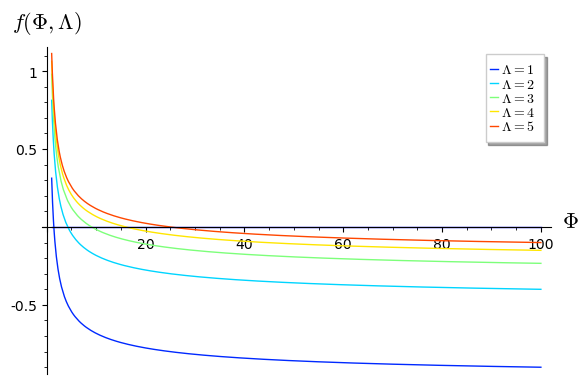

In [7]:
_Lmbd = [1, 2, 3, 4, 5]
colors = list_colormap(_Lmbd, sort=True)

p = plot(lambda _: f(_, 0), (x, 1, 100))
for i in _Lmbd:
    p += plot(lambda _: f(_, i), (x, 1, 100),
            rgbcolor=colors[i][:-1], legend_label=r'$\Lambda=%i$' % i,
              axes_labels=[r'$\Phi$', r'$f(\Phi, \Lambda)$'])
p

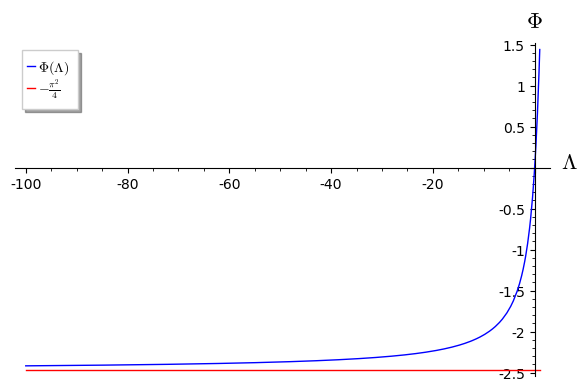

In [8]:
p = plot(Phi, (x, -100, 1),
        color='blue', legend_label=r'$\Phi(\Lambda)$',
        axes_labels=[r'$\Lambda$', r'$\Phi$'])
p += plot(-pi**2/4, (x, -100, 1),
         color='red', legend_label=r'$-\frac{\pi^2}{4}$')
p

## Plot

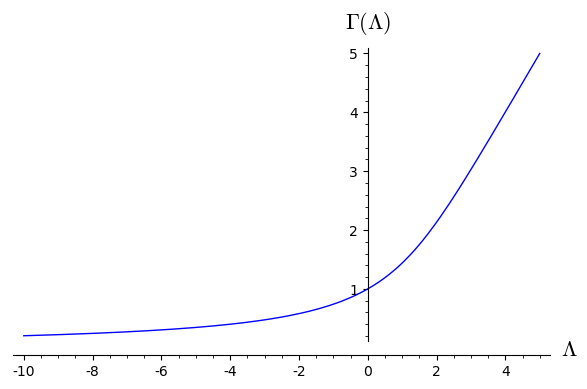

In [9]:
p = plot(Gamma, (x, -10, 5),
    axes_labels=[r'$\Lambda$', r'$\Gamma(\Lambda)$'])
p

In [10]:
p.save('gamma.eps')
p.save('gamma.svg')

# Plot $L\varepsilon(r)$

In [11]:
def Lepsilon(rL, Lambda):
    
    prefactor = (2./3.)*Gamma(Lambda)
    
    if Lambda == 0: return prefactor
    
    phi = Phi(Lambda)
    
    if Lambda > 0: return prefactor*cosh(sqrt(phi)*(1 - 2*rL))/cosh(sqrt(phi))
    if Lambda < 0: return prefactor*cos(sqrt(-phi)*(1 - 2*rL))/cos(sqrt(-phi))

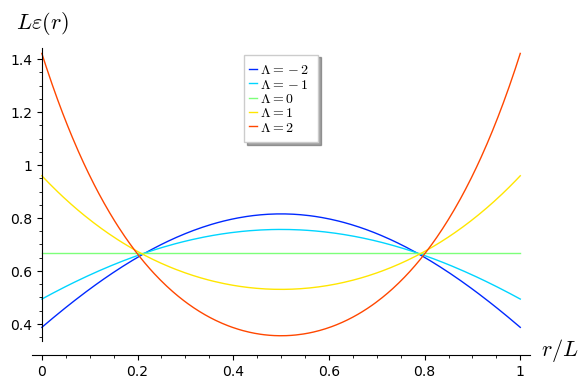

In [12]:
_Lmbd = [-2, -1, 0, 1, 2]
colors = list_colormap(_Lmbd, sort=True)

del p
for i in _Lmbd:
    try:
        p += plot(lambda _: Lepsilon(_, i), (x, 0, 1),
            rgbcolor=colors[i][:-1], legend_label=r'$\Lambda=%i$' % i,
              axes_labels=[r'$r/L$', r'$L\varepsilon(r)$'])
    except:
        p = plot(lambda _: Lepsilon(_, i), (x, 0, 1),
            rgbcolor=colors[i][:-1], legend_label=r'$\Lambda=%i$' % i,
              axes_labels=[r'$r/L$', r'$L\varepsilon(r)$'])
p

In [13]:
p.save('epsilon.eps')
p.save('epsilon.svg')